In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'house_price_regression_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


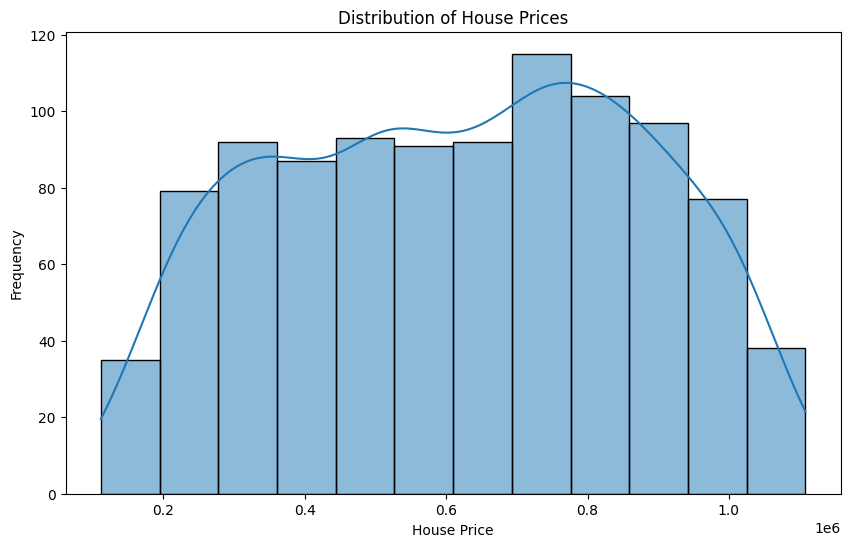

Linear Regression - Mean Squared Error: 101434798.50566845, R^2 Score: 0.9984263636823408


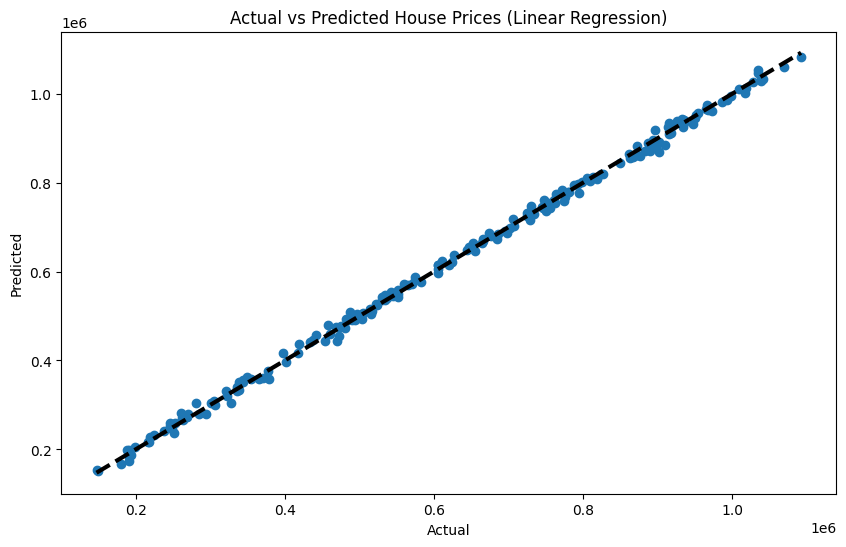

Decision Tree - Mean Squared Error: 969600136.0587759, R^2 Score: 0.9849578447417716


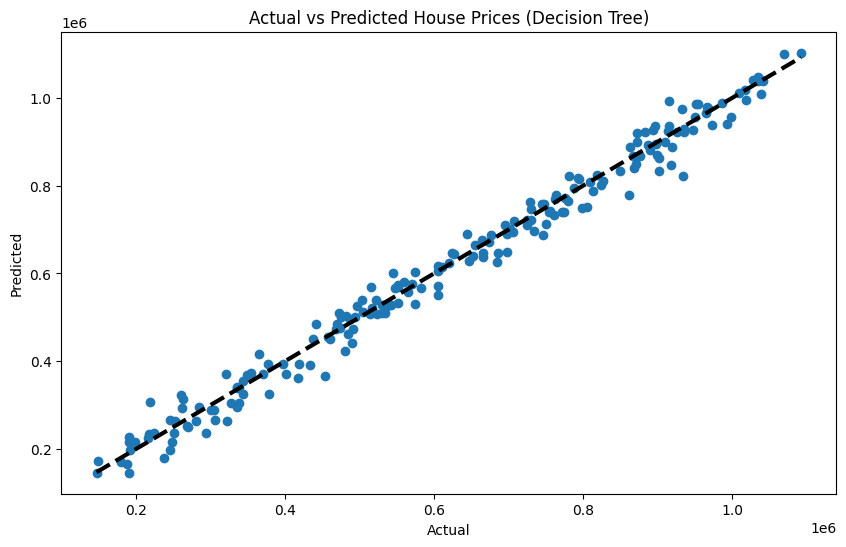

Random Forest - Mean Squared Error: 394131747.44603425, R^2 Score: 0.9938855300068556


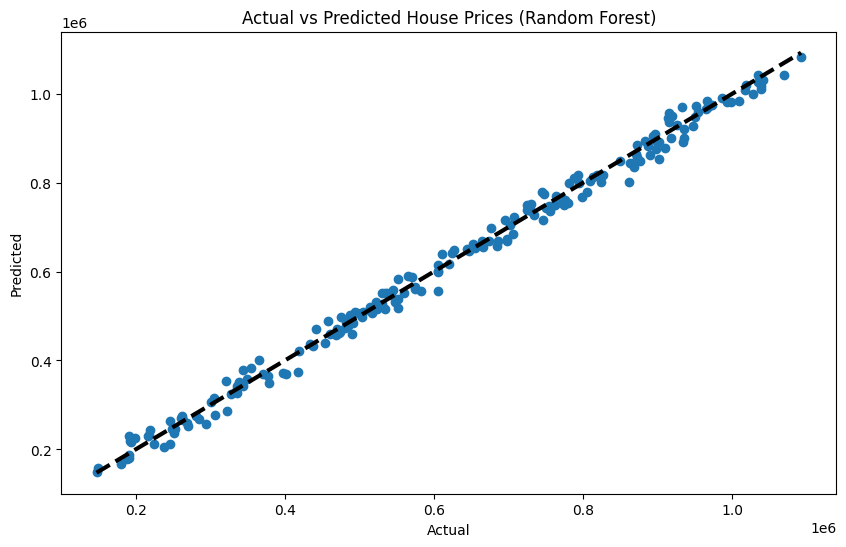

Gradient Boosting - Mean Squared Error: 224965597.8451496, R^2 Score: 0.9965099350498217


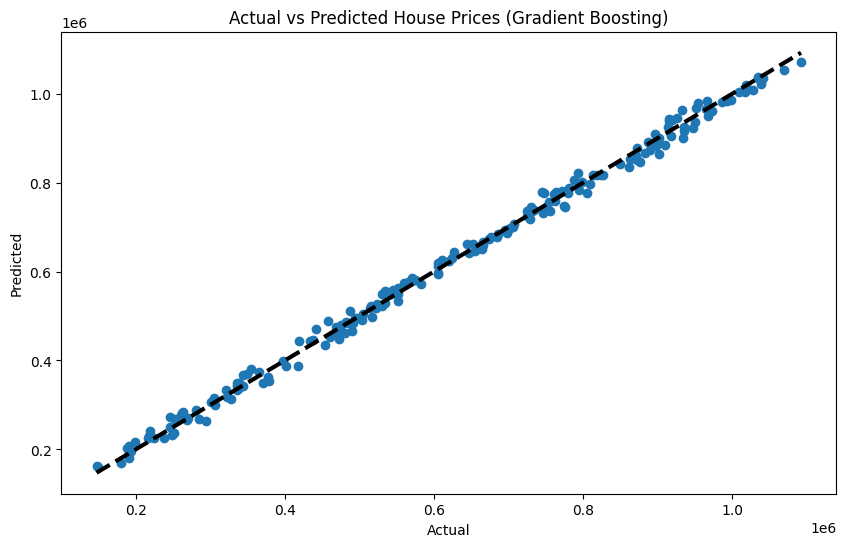

                            MSE       R^2
Linear Regression  1.014348e+08  0.998426
Decision Tree      9.696001e+08  0.984958
Random Forest      3.941317e+08  0.993886
Gradient Boosting  2.249656e+08  0.996510


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'house_price_regression_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

# Data Preprocessing
# Handle missing values, encode categorical variables, etc.
# Example: data.fillna(method='ffill', inplace=True)

# Exploratory Data Analysis (EDA)
# Example: Plotting the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(data['House_Price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()

# Feature Selection and Engineering
# Example: Selecting relevant features
features = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']
X = data[features]
y = data['House_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R^2': r2}
    print(f'{name} - Mean Squared Error: {mse}, R^2 Score: {r2}')

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted House Prices ({name})')
    plt.show()

# Display results
results_df = pd.DataFrame(results).T
print(results_df)